In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from lab_setup import *
from scipy.special import digamma

In [1]:
import scipy.stats as s

In [25]:
N = 100
a = 0.01*0

In [30]:
x = np.arange(N)
y = np.random.rand(N) + np.arange(N)*a

In [27]:
s.spearmanr(x,y)

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [28]:
s.pearsonr(np.arange(N), y)

(-0.090757268527723048, 0.36917628618920306)

<IPython.core.display.Javascript object>


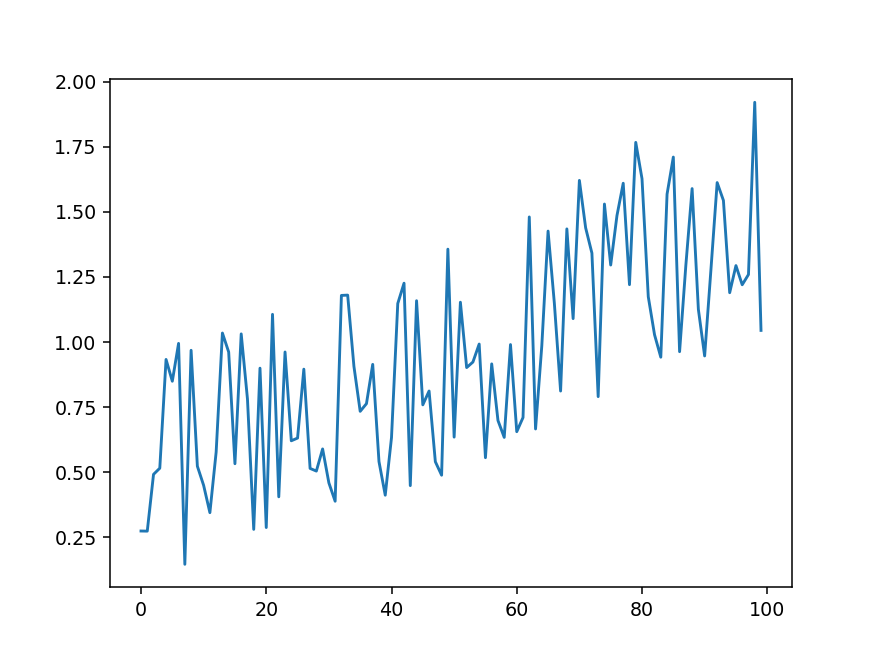

In [24]:
plt.plot(y)

In [19]:
s.pearsonr?

In [29]:
s.spearmanr?

In [62]:
def calc_w_x(trap):
    return e * trap.V_0 / (np.sqrt(2) * trap.w_E * Barium.mass * trap.X**2)
def calc_w_y(trap):
    return e * trap.V_0 / (np.sqrt(2) * trap.w_E * Barium.mass * trap.Y**2)
def calc_w_z(trap):
    return np.sqrt(2 * e * trap.V_caps / (Barium.mass * trap.Z**2))

def calc_x(w_x, trap):
    return np.sqrt(e * trap.V_0 / (np.sqrt(2) * trap.w_E * Barium.mass * w_x))
def calc_y(w_y, trap):
    return np.sqrt(e * trap.V_0 / (np.sqrt(2) * trap.w_E * Barium.mass * w_y))
def calc_z(w_z, trap):
    return np.sqrt(2 * e * trap.V_caps / (Barium.mass * w_z**2))

In [6]:
w_x, w_y, w_z = 2*np.pi*757e3, 2*np.pi*1070e3, 2*np.pi*297e3
trap = UW_Trap

In [68]:
# agreement in x and y
print calc_w_x(trap), w_x
print calc_x(w_x, trap), trap.X
print calc_w_y(trap), w_y
print calc_y(w_y, trap), trap.Y
print calc_w_z(trap), w_z
print calc_z(w_z, trap), trap.Z

4932539.35307 4756371.27753
0.000955722218299 0.0009385
6839470.33119 6723008.27868
0.000803873539145 0.000797
1864969.02848 1866106.03623
0.00200877531848 0.00201


In [67]:
expected_w, observed_w = calc_w_x(trap), w_x
expected_z, observed_z = calc_x(w_x, trap), trap.X
dev = expected_w / observed_w
print expected_w, observed_w, dev

4932539.35307 4756371.27753 1.03703833558


In [66]:
calc_x(0.8e6*2*np.pi, trap), calc_y(1.1e6*2*np.pi, trap), calc_z(210e3*2*np.pi, trap)

(0.00092968244149734132, 0.00079283585004186424, 0.0028409822361388708)

In [3]:
def N(n): # for coulomb calculation
    return 1 + n * ( -digamma(1) + digamma(n) - 1)

def M(n): # for electric field calculation
    if n % 2 == 1: # n is odd
        return (n-1)*n*(n+1)
    return n**3-n-6

In [14]:
def distance(n, trap):
    if n == 1:
        return 0.
    if n == 2:
        return (2 * K * e * trap.Z**2 / trap.V_caps)**(1./3)
    const = 6 * K * e * trap.Z**2 / (trap.V_caps)
    combo = N(n) / M(n)
    return (const * combo)**(1./3)

In [18]:
distance(2, trap)

7.1959695984012194e-06

In [10]:
def old_dist(trap):
    return (e*trap.Z**2/(2*np.pi*vacuum_permittivity*trap.V_caps))**(1./3)
old_dist(trap)

1.324360311353915e-05

<IPython.core.display.Javascript object>


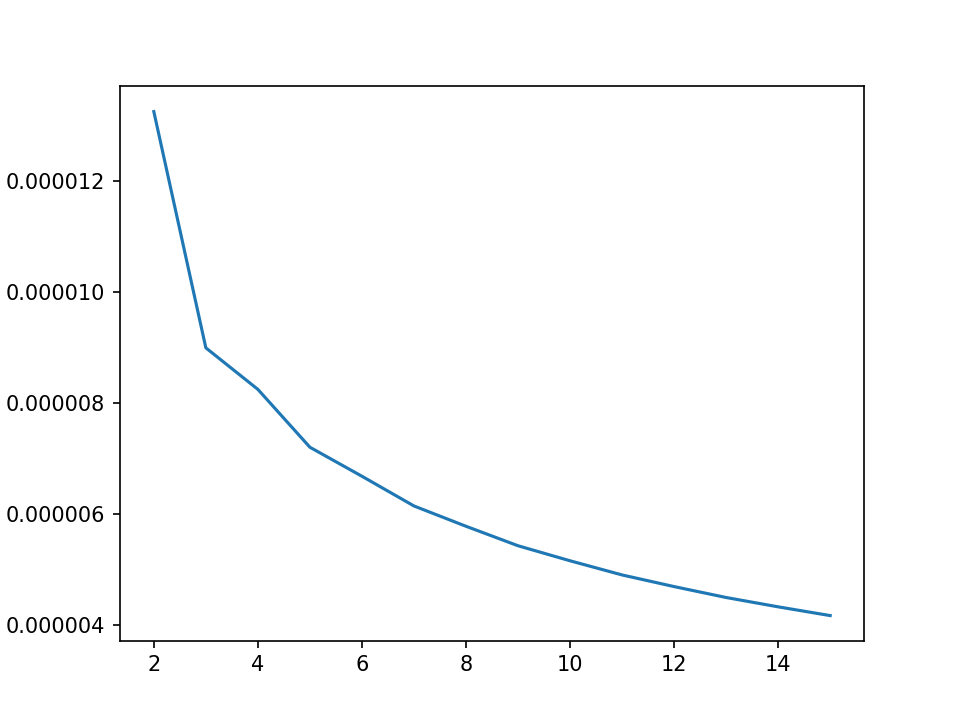

In [19]:
d = np.vectorize(lambda n: distance(n, trap))
x = np.arange(2,16)
y = d(x)
plt.plot(x,y)